# **Extracting Dataset using Kaggle API**

In [1]:
# installing the Kaggle library
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# **Importing the Dog vs Cat Dataset from Kaggle**

In [3]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 808M/812M [00:14<00:00, 71.4MB/s]
100% 812M/812M [00:14<00:00, 58.8MB/s]


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [8]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.2072.jpg', 'cat.4183.jpg', 'cat.8205.jpg', 'dog.7242.jpg', 'dog.2791.jpg', 'cat.6559.jpg', 'cat.3624.jpg', 'dog.3860.jpg', 'cat.4877.jpg', 'cat.2328.jpg', 'cat.715.jpg', 'dog.7083.jpg', 'dog.6647.jpg', 'dog.4565.jpg', 'cat.10625.jpg', 'dog.4250.jpg', 'dog.4632.jpg', 'dog.11938.jpg', 'cat.9456.jpg', 'dog.5277.jpg', 'cat.12048.jpg', 'cat.75.jpg', 'cat.4144.jpg', 'cat.427.jpg', 'cat.11967.jpg', 'cat.6011.jpg', 'dog.690.jpg', 'dog.11652.jpg', 'dog.9592.jpg', 'cat.10334.jpg', 'cat.1295.jpg', 'dog.11687.jpg', 'cat.2937.jpg', 'cat.4110.jpg', 'dog.3247.jpg', 'dog.3298.jpg', 'cat.5327.jpg', 'cat.12348.jpg', 'cat.2841.jpg', 'cat.4948.jpg', 'dog.9538.jpg', 'dog.5816.jpg', 'dog.6917.jpg', 'cat.6793.jpg', 'cat.4928.jpg', 'dog.9058.jpg', 'dog.3844.jpg', 'cat.9711.jpg', 'cat.6914.jpg', 'dog.6963.jpg', 'dog.10622.jpg', 'cat.10839.jpg', 'cat.2714.jpg', 'dog.10416.jpg', 'dog.1365.jpg', 'cat.10305.jpg', 'dog.1547.jpg', 'dog.461.jpg', 'dog.7646.jpg', 'dog.8184.jpg', 'cat.7270.jpg', 'dog.9426.jpg', '

# **Importing the Dependencies**

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

# **Displaying the images of dogs and cats**

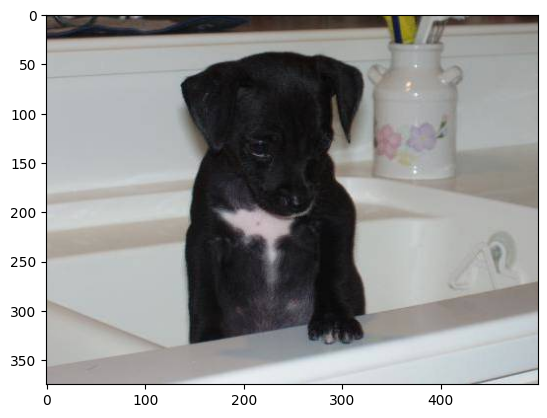

In [10]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

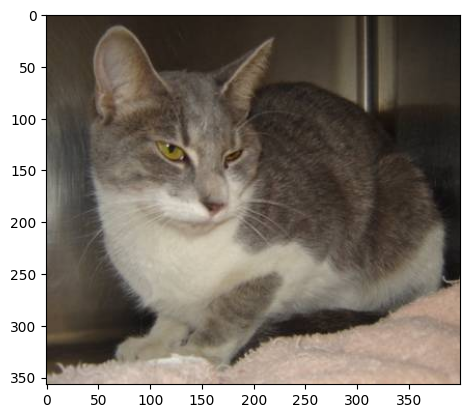

In [11]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [12]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])

dog
cat
cat
dog
dog


In [13]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


# **Resizing all the images**

In [14]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [15]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

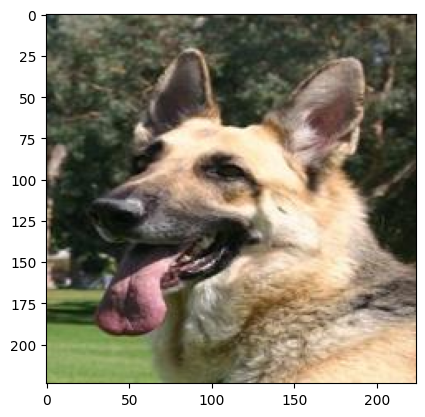

In [16]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.2072.jpg')
imgplt = plt.imshow(img)
plt.show()

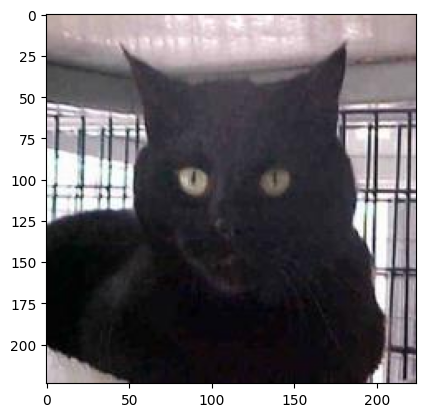

In [17]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.4183.jpg')
imgplt = plt.imshow(img)
plt.show()

# **Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [18]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [19]:
print(filenames[0:5])
print(len(filenames))

['dog.2072.jpg', 'cat.4183.jpg', 'cat.8205.jpg', 'dog.7242.jpg', 'dog.2791.jpg']
2000


In [20]:
print(labels[0:5])
print(len(labels))

[1, 0, 0, 1, 1]
2000


In [21]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1011  989]


# **Converting all the resized images to numpy arrays**

In [22]:
import cv2
import glob

In [23]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [24]:
print(dog_cat_images)

[[[[106  99  82]
   [ 99  95  77]
   [ 99  96  81]
   ...
   [ 40  52  62]
   [ 45  57  67]
   [ 38  50  60]]

  [[ 79  72  55]
   [ 82  78  60]
   [ 95  92  77]
   ...
   [ 47  59  69]
   [ 49  61  71]
   [ 41  53  63]]

  [[ 59  55  37]
   [ 65  63  45]
   [ 82  82  66]
   ...
   [ 49  61  71]
   [ 49  61  71]
   [ 42  54  64]]

  ...

  [[103 175 152]
   [101 173 150]
   [102 174 151]
   ...
   [179 216 250]
   [172 208 244]
   [164 200 238]]

  [[100 172 150]
   [101 173 151]
   [102 174 152]
   ...
   [182 217 251]
   [184 218 254]
   [186 220 255]]

  [[ 87 159 137]
   [ 91 163 141]
   [ 96 168 146]
   ...
   [182 217 250]
   [189 223 255]
   [196 230 255]]]


 [[[175 182 199]
   [174 181 198]
   [173 180 197]
   ...
   [168 170 188]
   [166 168 186]
   [164 166 184]]

  [[172 179 196]
   [171 178 195]
   [170 177 194]
   ...
   [165 167 185]
   [163 165 183]
   [161 163 181]]

  [[167 174 191]
   [167 174 191]
   [166 173 190]
   ...
   [161 163 181]
   [159 161 179]
   [157 159

In [25]:
type(dog_cat_images)

numpy.ndarray

In [26]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [27]:
X = dog_cat_images
Y = np.asarray(labels)

# **Train Test Split**

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [30]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [31]:
print(X_train_scaled)

[[[[0.63921569 0.69411765 0.76470588]
   [0.6745098  0.72941176 0.8       ]
   [0.69019608 0.74117647 0.80392157]
   ...
   [0.40392157 0.56078431 0.6745098 ]
   [0.42745098 0.58039216 0.69019608]
   [0.37647059 0.52941176 0.63921569]]

  [[0.53333333 0.58823529 0.65882353]
   [0.57254902 0.62745098 0.69803922]
   [0.60784314 0.66666667 0.72941176]
   ...
   [0.35294118 0.50196078 0.61960784]
   [0.38823529 0.54117647 0.65098039]
   [0.40392157 0.55686275 0.66666667]]

  [[0.38431373 0.44705882 0.51372549]
   [0.41568627 0.47843137 0.54509804]
   [0.44313725 0.50588235 0.57254902]
   ...
   [0.3372549  0.47843137 0.59607843]
   [0.34901961 0.49411765 0.60392157]
   [0.37254902 0.51764706 0.62745098]]

  ...

  [[0.54901961 0.63137255 0.78039216]
   [0.54509804 0.63529412 0.78431373]
   [0.52156863 0.60784314 0.76862745]
   ...
   [0.52941176 0.59607843 0.93333333]
   [0.49803922 0.57647059 0.90980392]
   [0.48627451 0.56862745 0.90196078]]

  [[0.41176471 0.47843137 0.60784314]
   [0.4

In [ ]:
X_train_flattened = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_test_flattened = X_test_scaled.reshape(X_test_scaled.shape[0], -1)

# **Support Vector Machine Model**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Train SVM
svm_classifier = SVC(kernel='linear')  # You can also try 'rbf', 'poly', etc.
svm_classifier.fit(X_train_flattened, Y_train)

SVC(kernel='linear')

In [ ]:
# Predict on the test set
y_pred = svm_classifier.predict(X_test_flattened)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 55.25%


In [ ]:
# Print classification report
report = classification_report(Y_test, y_pred, target_names=['cat', 'dog'])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         cat       0.54      0.62      0.58       199
         dog       0.56      0.48      0.52       201

    accuracy                           0.55       400
   macro avg       0.55      0.55      0.55       400
weighted avg       0.55      0.55      0.55       400



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Print confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[124  75]
 [104  97]]


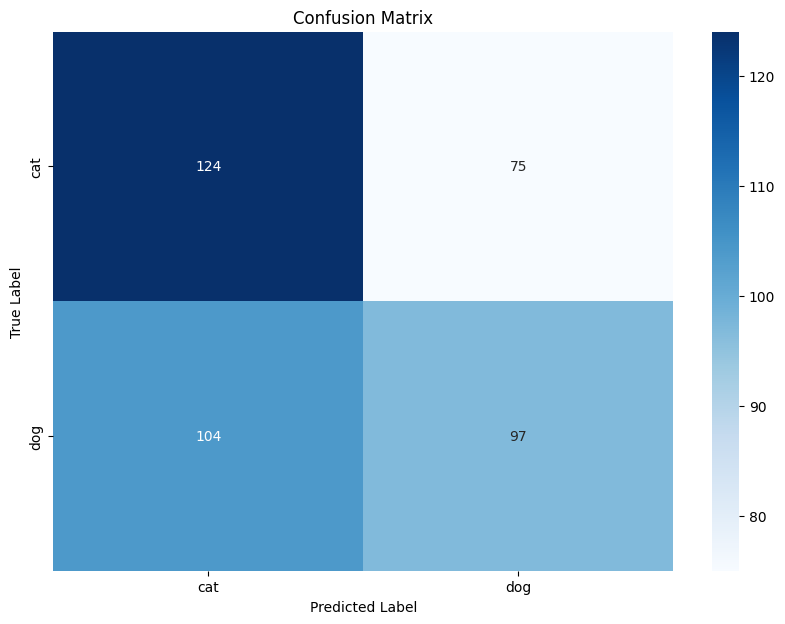

In [ ]:
import seaborn as sns
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['cat', 'dog'], yticklabels=['cat', 'dog'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()